# Setup and Dowload Datasets

In [1]:
# base URL for the raw files from github
BASE_URL = "https://raw.githubusercontent.com/ck-cap/xai-series/refs/heads/master/"

# Download the utils script
!curl -sSO {BASE_URL}utils.py

# Download the Task 1 script (EDA)
!curl -sSO {BASE_URL}00_data_exploration.py

# Download dataset and put under /data folder
!mkdir -p data
!curl -sSL -o data/stroke-prediction-dataset.zip https://www.kaggle.com/api/v1/datasets/download/fedesoriano/stroke-prediction-dataset

# Unzip the datasets then remove the zip files
!unzip -o data/stroke-prediction-dataset.zip -d data
!rm data/*.zip

# list the files to check is everything is downloaded
!ls -lR

# Import libraries
import pandas as pd
import numpy as np
from utils import DataLoader
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import f1_score, accuracy_score
import shap


Archive:  data/stroke-prediction-dataset.zip
  inflating: data/healthcare-dataset-stroke-data.csv  
.:
total 16
-rw-r--r-- 1 root root 1365 Nov 22 10:27 00_data_exploration.py
drwxr-xr-x 2 root root 4096 Nov 22 10:28 data
drwxr-xr-x 1 root root 4096 Nov 20 14:30 sample_data
-rw-r--r-- 1 root root 1969 Nov 22 10:27 utils.py

./data:
total 312
-rw-r--r-- 1 root root 316971 Jan 26  2021 healthcare-dataset-stroke-data.csv

./sample_data:
total 55504
-rwxr-xr-x 1 root root     1697 Jan  1  2000 anscombe.json
-rw-r--r-- 1 root root   301141 Nov 20 14:30 california_housing_test.csv
-rw-r--r-- 1 root root  1706430 Nov 20 14:30 california_housing_train.csv
-rw-r--r-- 1 root root 18289443 Nov 20 14:30 mnist_test.csv
-rw-r--r-- 1 root root 36523880 Nov 20 14:30 mnist_train_small.csv
-rwxr-xr-x 1 root root      962 Jan  1  2000 README.md


# Task 1 - Exploratory Data Analysis

(5110, 12)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB
col:  id


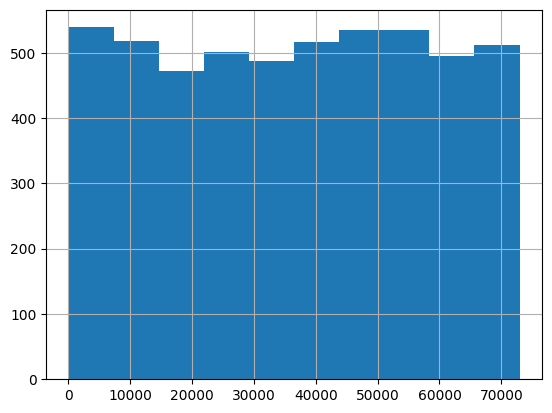

col:  gender


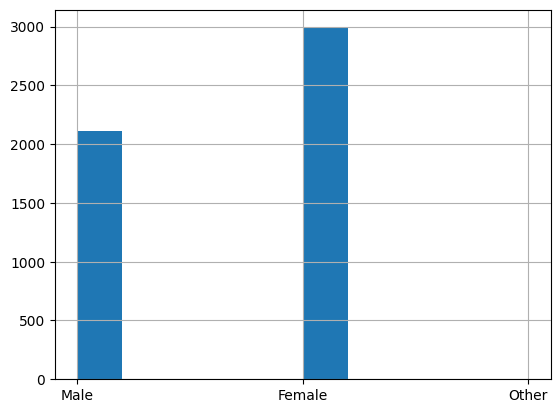

col:  age


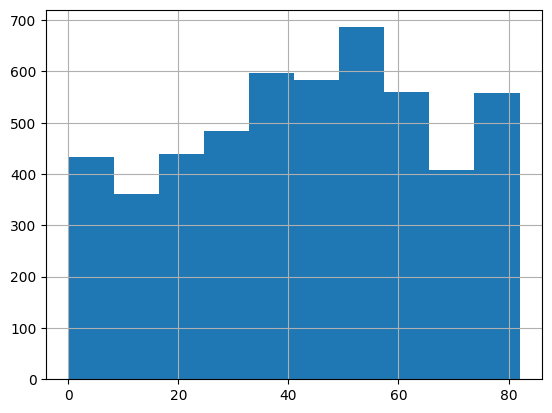

col:  hypertension


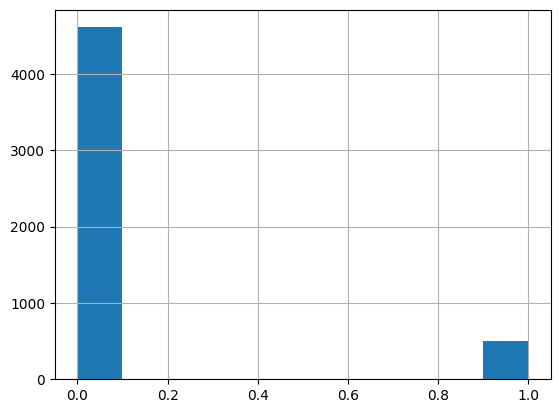

col:  heart_disease


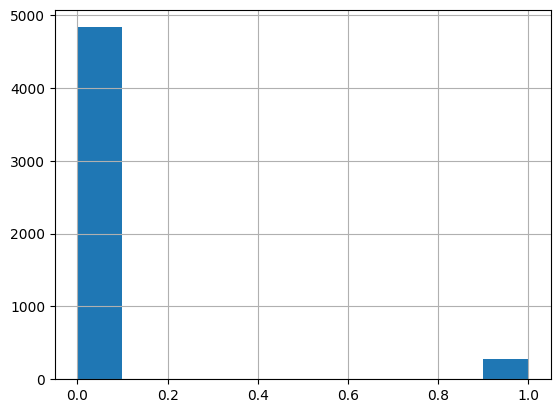

col:  ever_married


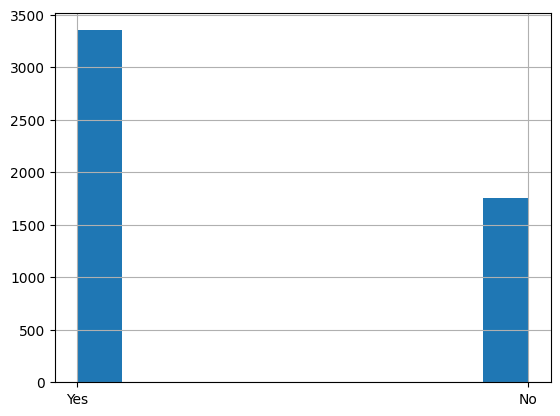

col:  work_type


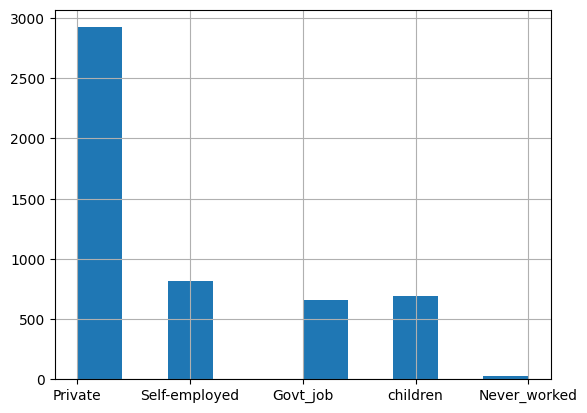

col:  Residence_type


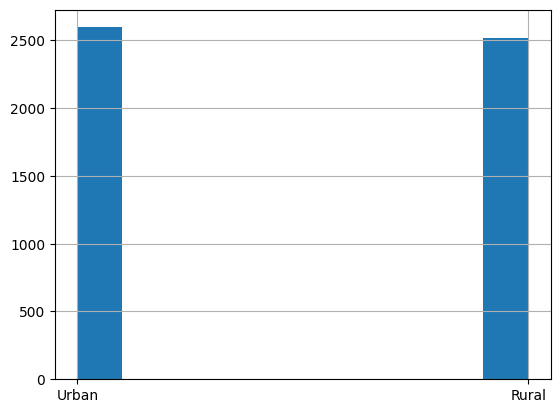

col:  avg_glucose_level


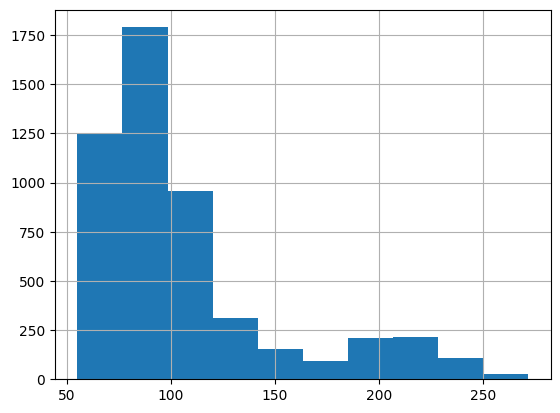

col:  bmi


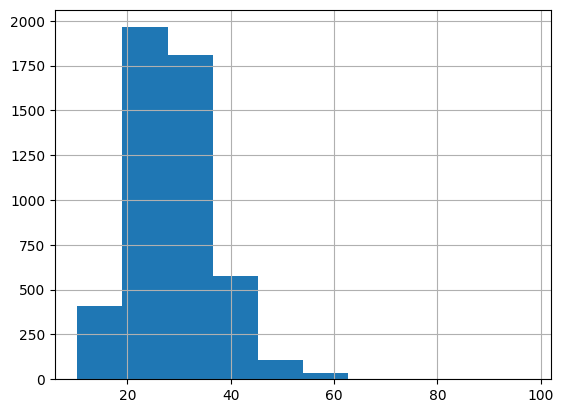

col:  smoking_status


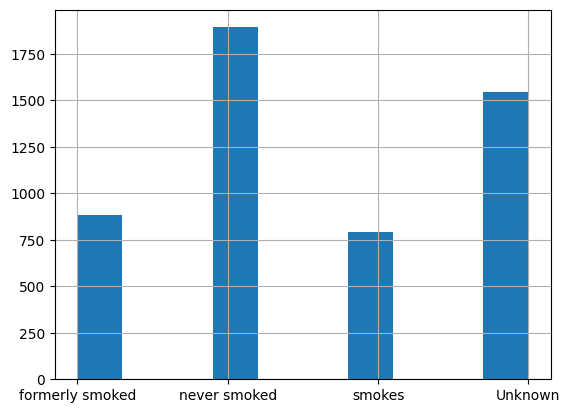

col:  stroke


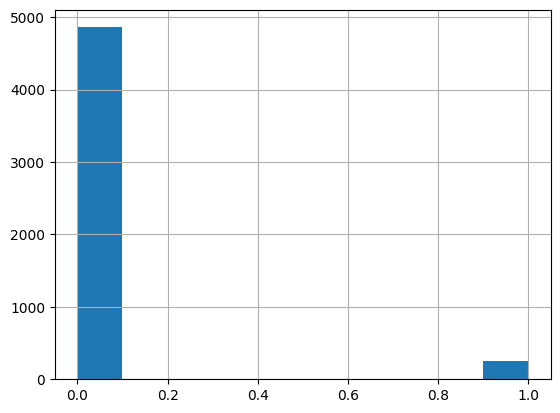

--- Target Distribution ---
stroke
0    0.951272
1    0.048728
Name: proportion, dtype: float64


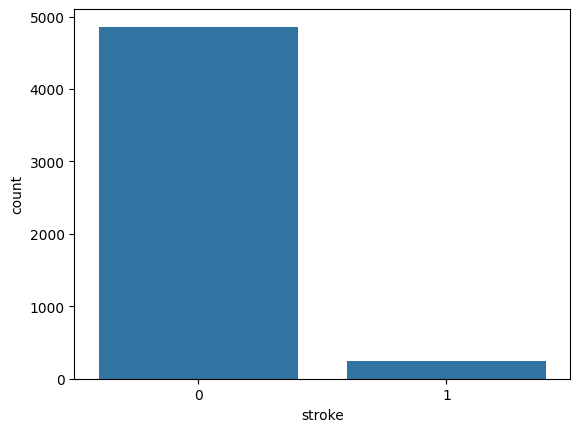

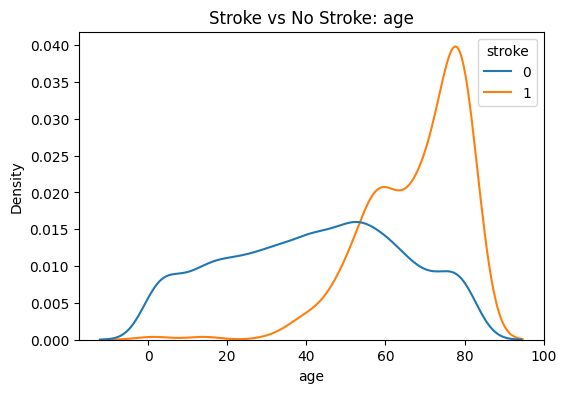

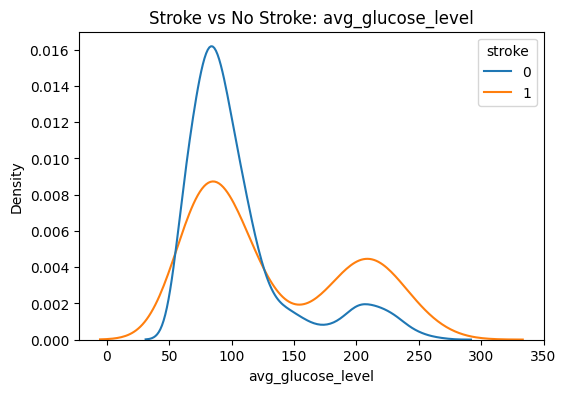

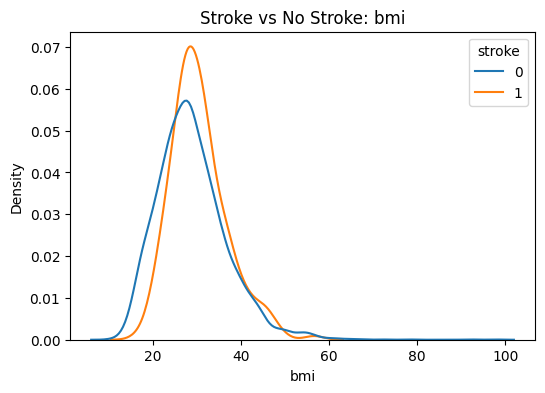

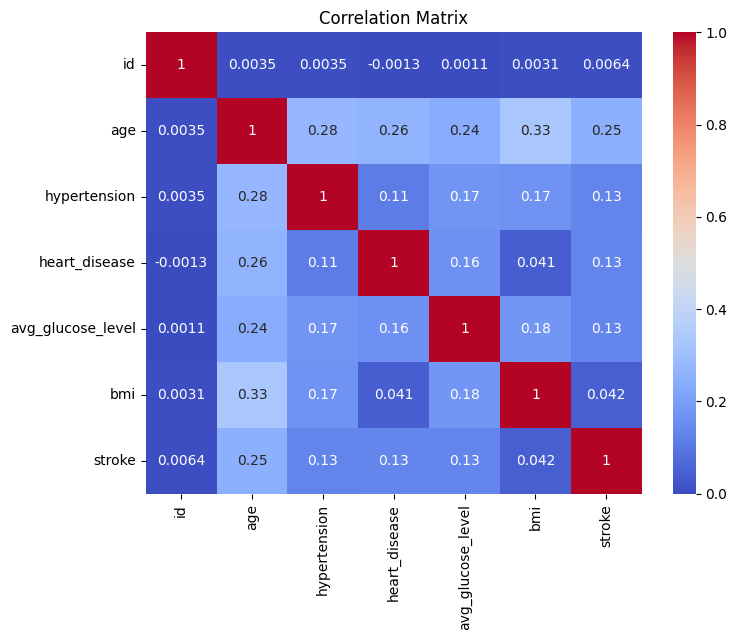

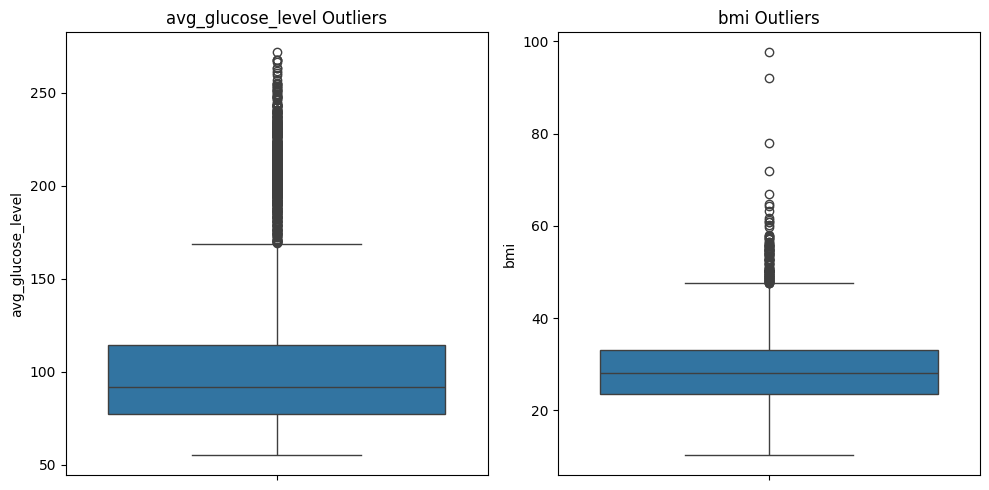

<Figure size 640x480 with 0 Axes>

In [7]:
# Task 1 - Exploratory Data Analysis
%matplotlib inline
%run 00_data_exploration.py

# Task 2 - Create XAI Explainer Using SHAP

In [8]:
# 1. Load and Preprocess Data
data_loader = DataLoader()
data_loader.load_dataset()
data_loader.preprocess_data()

# Split the data
X_train, X_test, y_train, y_test = data_loader.get_data_split()

# Oversample to fix imbalance
X_train, y_train = data_loader.oversample(X_train, y_train)

# 2. Fit Blackbox Model (Required before explaining)
rf = RandomForestClassifier()
rf.fit(X_train, y_train)

# Check accuracy just to be sure it works
y_pred = rf.predict(X_test)
print(f"F1 Score {f1_score(y_test, y_pred, average='macro')}")
print(f"Accuracy: {accuracy_score(y_test, y_pred)}")

# 3. Create SHAP Explainer
# We use TreeExplainer because RandomForest is a tree-based model
explainer = shap.TreeExplainer(rf)

print("Task 2 - SHAP Explainer created.")

F1 Score 0.5168545627909585
Accuracy: 0.9422700587084148
Task 2 - SHAP Explainer created.


# Task 3 - Visualize Local Explainer

SHAP values shape: (1, 21, 2)
Shape format: [samples, features, classes]
Number of classes: 2
PATIENT #1 - Low Risk Patient

Patient Features:
                                 2813
gender_Female                   False
gender_Male                      True
gender_Other                    False
ever_married_No                 False
ever_married_Yes                 True
work_type_Govt_job              False
work_type_Never_worked          False
work_type_Private                True
work_type_Self-employed         False
work_type_children              False
Residence_type_Rural            False
Residence_type_Urban             True
smoking_status_Unknown          False
smoking_status_formerly smoked  False
smoking_status_never smoked      True
smoking_status_smokes           False
age                              43.0
hypertension                        0
heart_disease                       0
avg_glucose_level               91.13
bmi                              33.9

Prediction for sampl

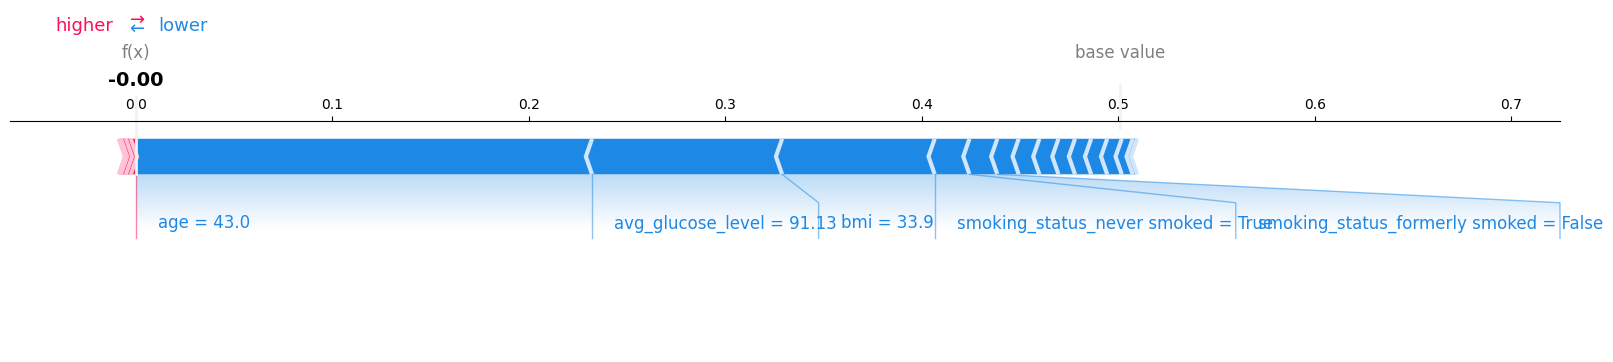


--- Waterfall for Class 1 (Stroke) ---


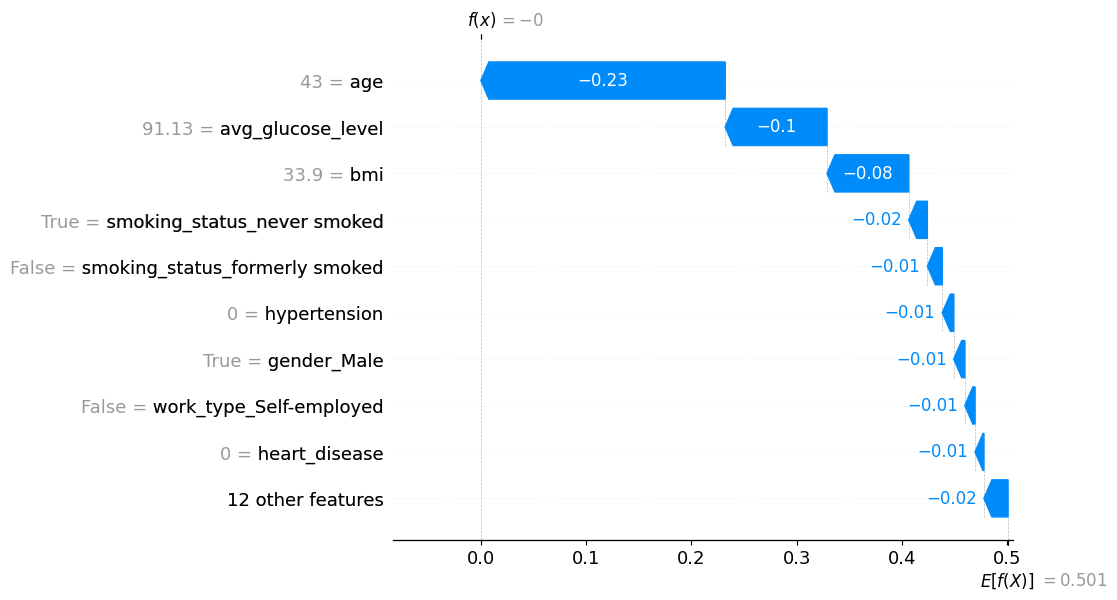

PATIENT #9 - High Risk Patient

Patient Features:
                                  293
gender_Female                   False
gender_Male                      True
gender_Other                    False
ever_married_No                 False
ever_married_Yes                 True
work_type_Govt_job              False
work_type_Never_worked          False
work_type_Private                True
work_type_Self-employed         False
work_type_children              False
Residence_type_Rural            False
Residence_type_Urban             True
smoking_status_Unknown          False
smoking_status_formerly smoked   True
smoking_status_never smoked     False
smoking_status_smokes           False
age                              67.0
hypertension                        0
heart_disease                       0
avg_glucose_level               190.7
bmi                              36.0

Prediction for sample_high_risk 9:
Predicted class: 0
Probability for class 0: 0.3700
Probability for class 1: 0.

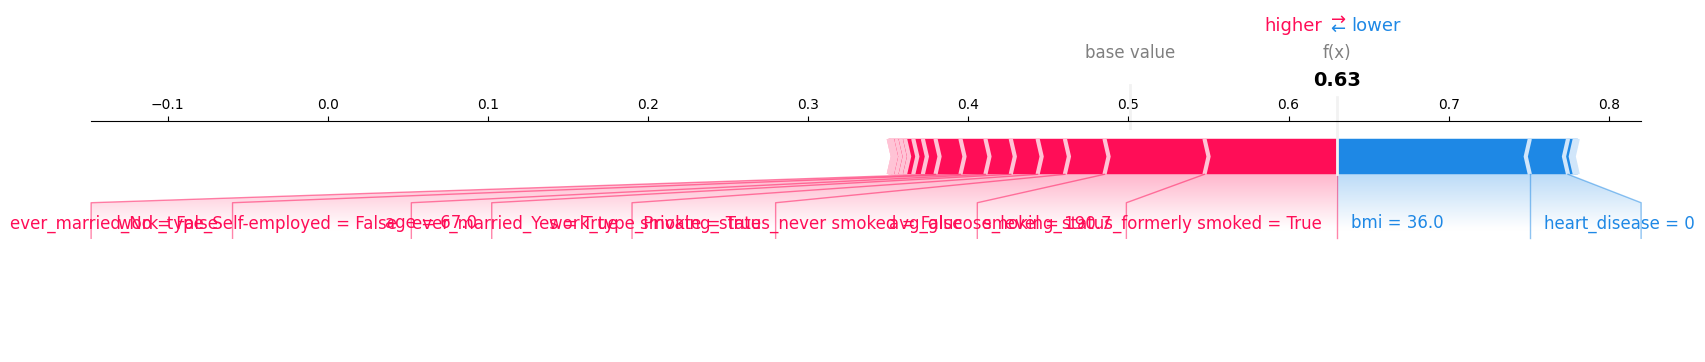


--- Waterfall for Class 1 (Stroke) ---


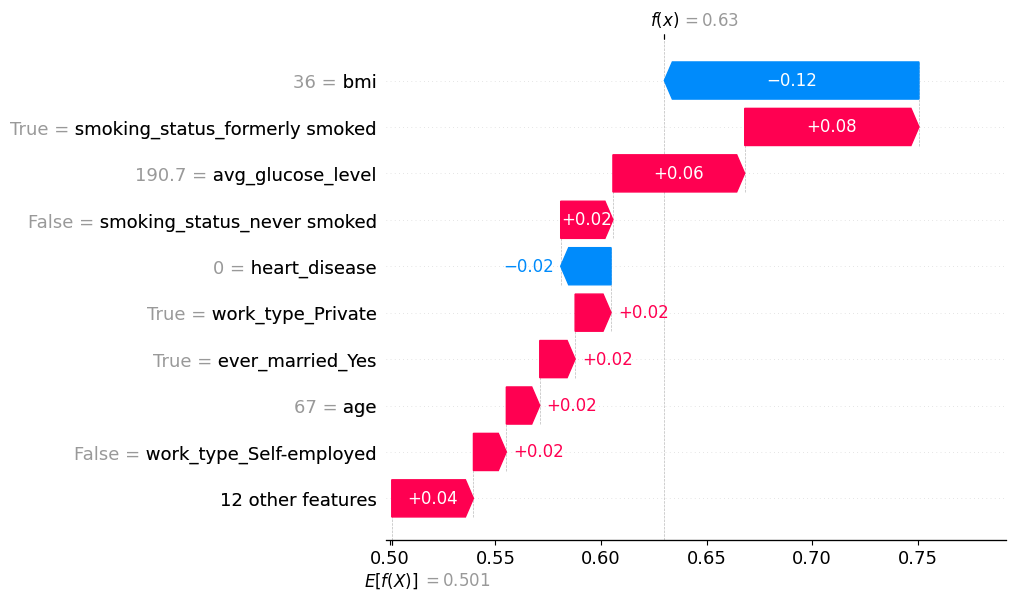

In [15]:
# Calculate SHAP values for a single patient
sample_idx = 1
sample = X_test[sample_idx:sample_idx+1]
shap_values_single = explainer(sample)

print(f"SHAP values shape: {shap_values_single.shape}")
print(f"Shape format: [samples, features, classes]")
print(f"Number of classes: {shap_values_single.values.shape[2]}")

# Display patient information
print(f"PATIENT #{sample_idx} - Low Risk Patient")
feature_names = X_train.columns
patient_data = pd.DataFrame(sample, columns=feature_names)
print("\nPatient Features:")
print(patient_data.T.to_string())


# Visualize (Task 3)
prediction = rf.predict(sample)[0]
predicted_proba = rf.predict_proba(sample)[0]
print(f"\nPrediction for sample {sample_idx}:")
print(f"Predicted class: {prediction}")
print(f"Probability for class 0: {predicted_proba[0]:.4f}")
print(f"Probability for class 1: {predicted_proba[1]:.4f}")

# Force plot
print("\n--- Force Plot for Class 1 (Stroke) ---")
shap.plots.force(shap_values_single[0, :, 1], matplotlib=True)
print("\n--- Waterfall for Class 1 (Stroke) ---")
shap.plots.waterfall(shap_values_single[0, :, 1])

# Find patient who predicted to have stroke
stroke_indices = np.where(rf.predict(X_test) == 1)[0]
if len(stroke_indices) > 0:
    high_risk_idx = stroke_indices[0]
    print(f"PATIENT #{high_risk_idx} - High Risk Patient")
    sample_high_risk = X_test[high_risk_idx:high_risk_idx+1]
    shap_values_high_risk = explainer(sample_high_risk)
    patient_high_risk_data = pd.DataFrame(sample_high_risk, columns=feature_names)
    print("\nPatient Features:")
    print(patient_high_risk_data.T.to_string())

    prediction_hr = rf.predict(sample_high_risk)[0]
    predicted_proba_hr = rf.predict_proba(sample_high_risk)[0]
    print(f"\nPrediction for sample_high_risk {high_risk_idx}:")
    print(f"Predicted class: {prediction}")
    print(f"Probability for class 0: {predicted_proba_hr[0]:.4f}")
    print(f"Probability for class 1: {predicted_proba_hr[1]:.4f}")
    
    print("\n--- Force Plot for High-Risk Patient (Class 1) ---")
    shap.plots.force(shap_values_high_risk[0, :, 1], matplotlib=True)
    print("\n--- Waterfall for Class 1 (Stroke) ---")
    shap.plots.waterfall(shap_values_high_risk[0, :, 1])

# Task 4 - Visualize Global Explainer

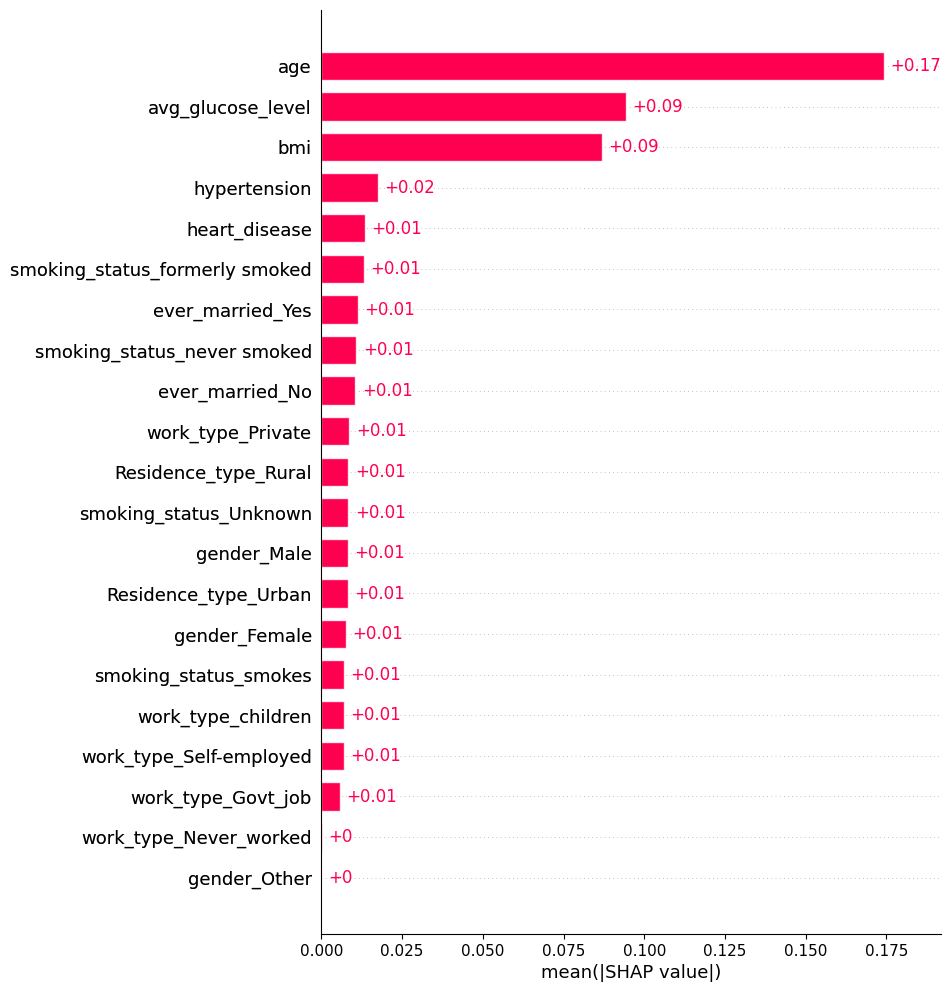

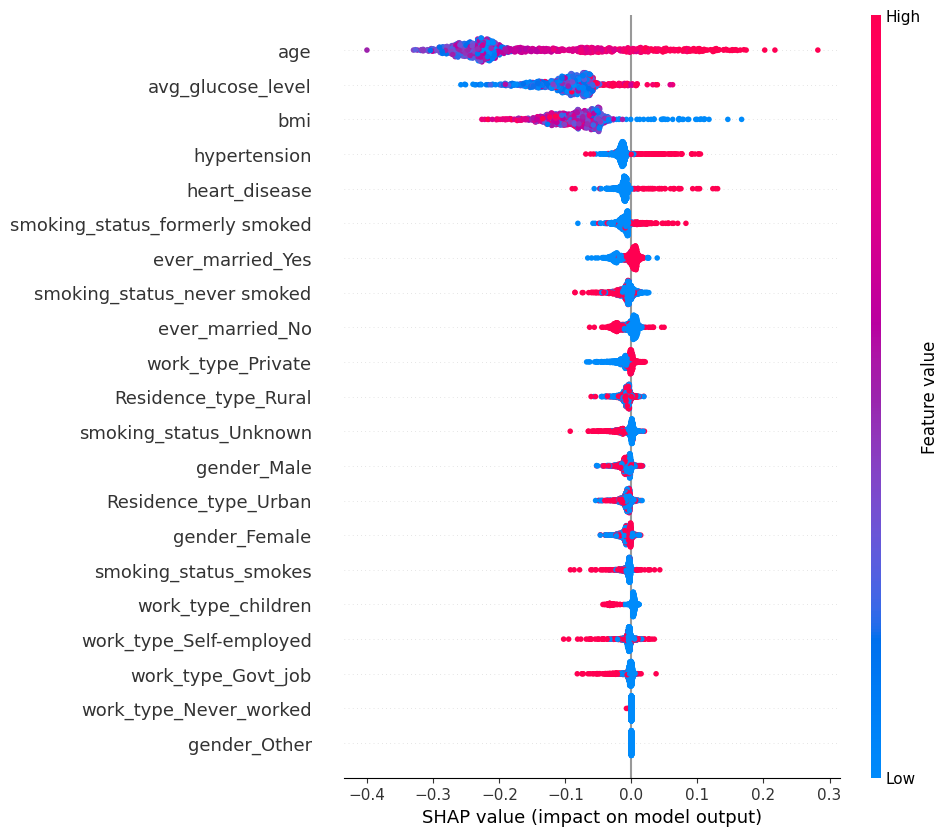

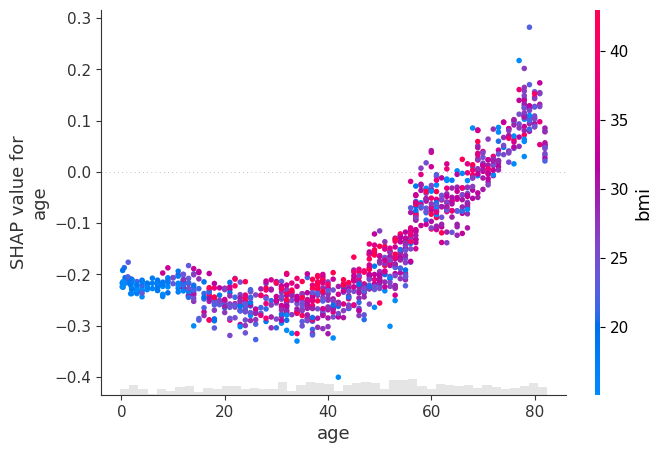

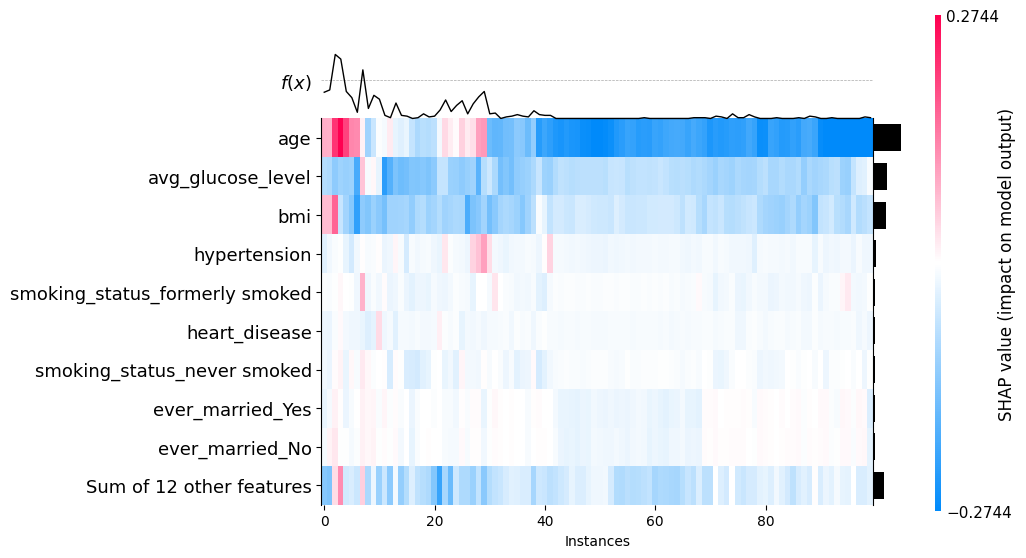

<Axes: xlabel='Instances'>

In [19]:
shap_values_all = explainer(X_test)

# Bar plot for overall feature importance
shap.plots.bar(shap_values_all[:, :, 1], max_display=23)

# Distribution plot
shap.plots.beeswarm(shap_values_all[:, :, 1], max_display=23)

# Dependence plot for feeature interaction
shap.plots.scatter(shap_values_all[:, :, 1][:, "age"], color=shap_values_all[:, :, 1])

# Heatmap for SHAP values to show patterns across samples
shap.plots.heatmap(shap_values_all[:100, :, 1])


# Task 5 - Model Explanation

## As Data Scientist

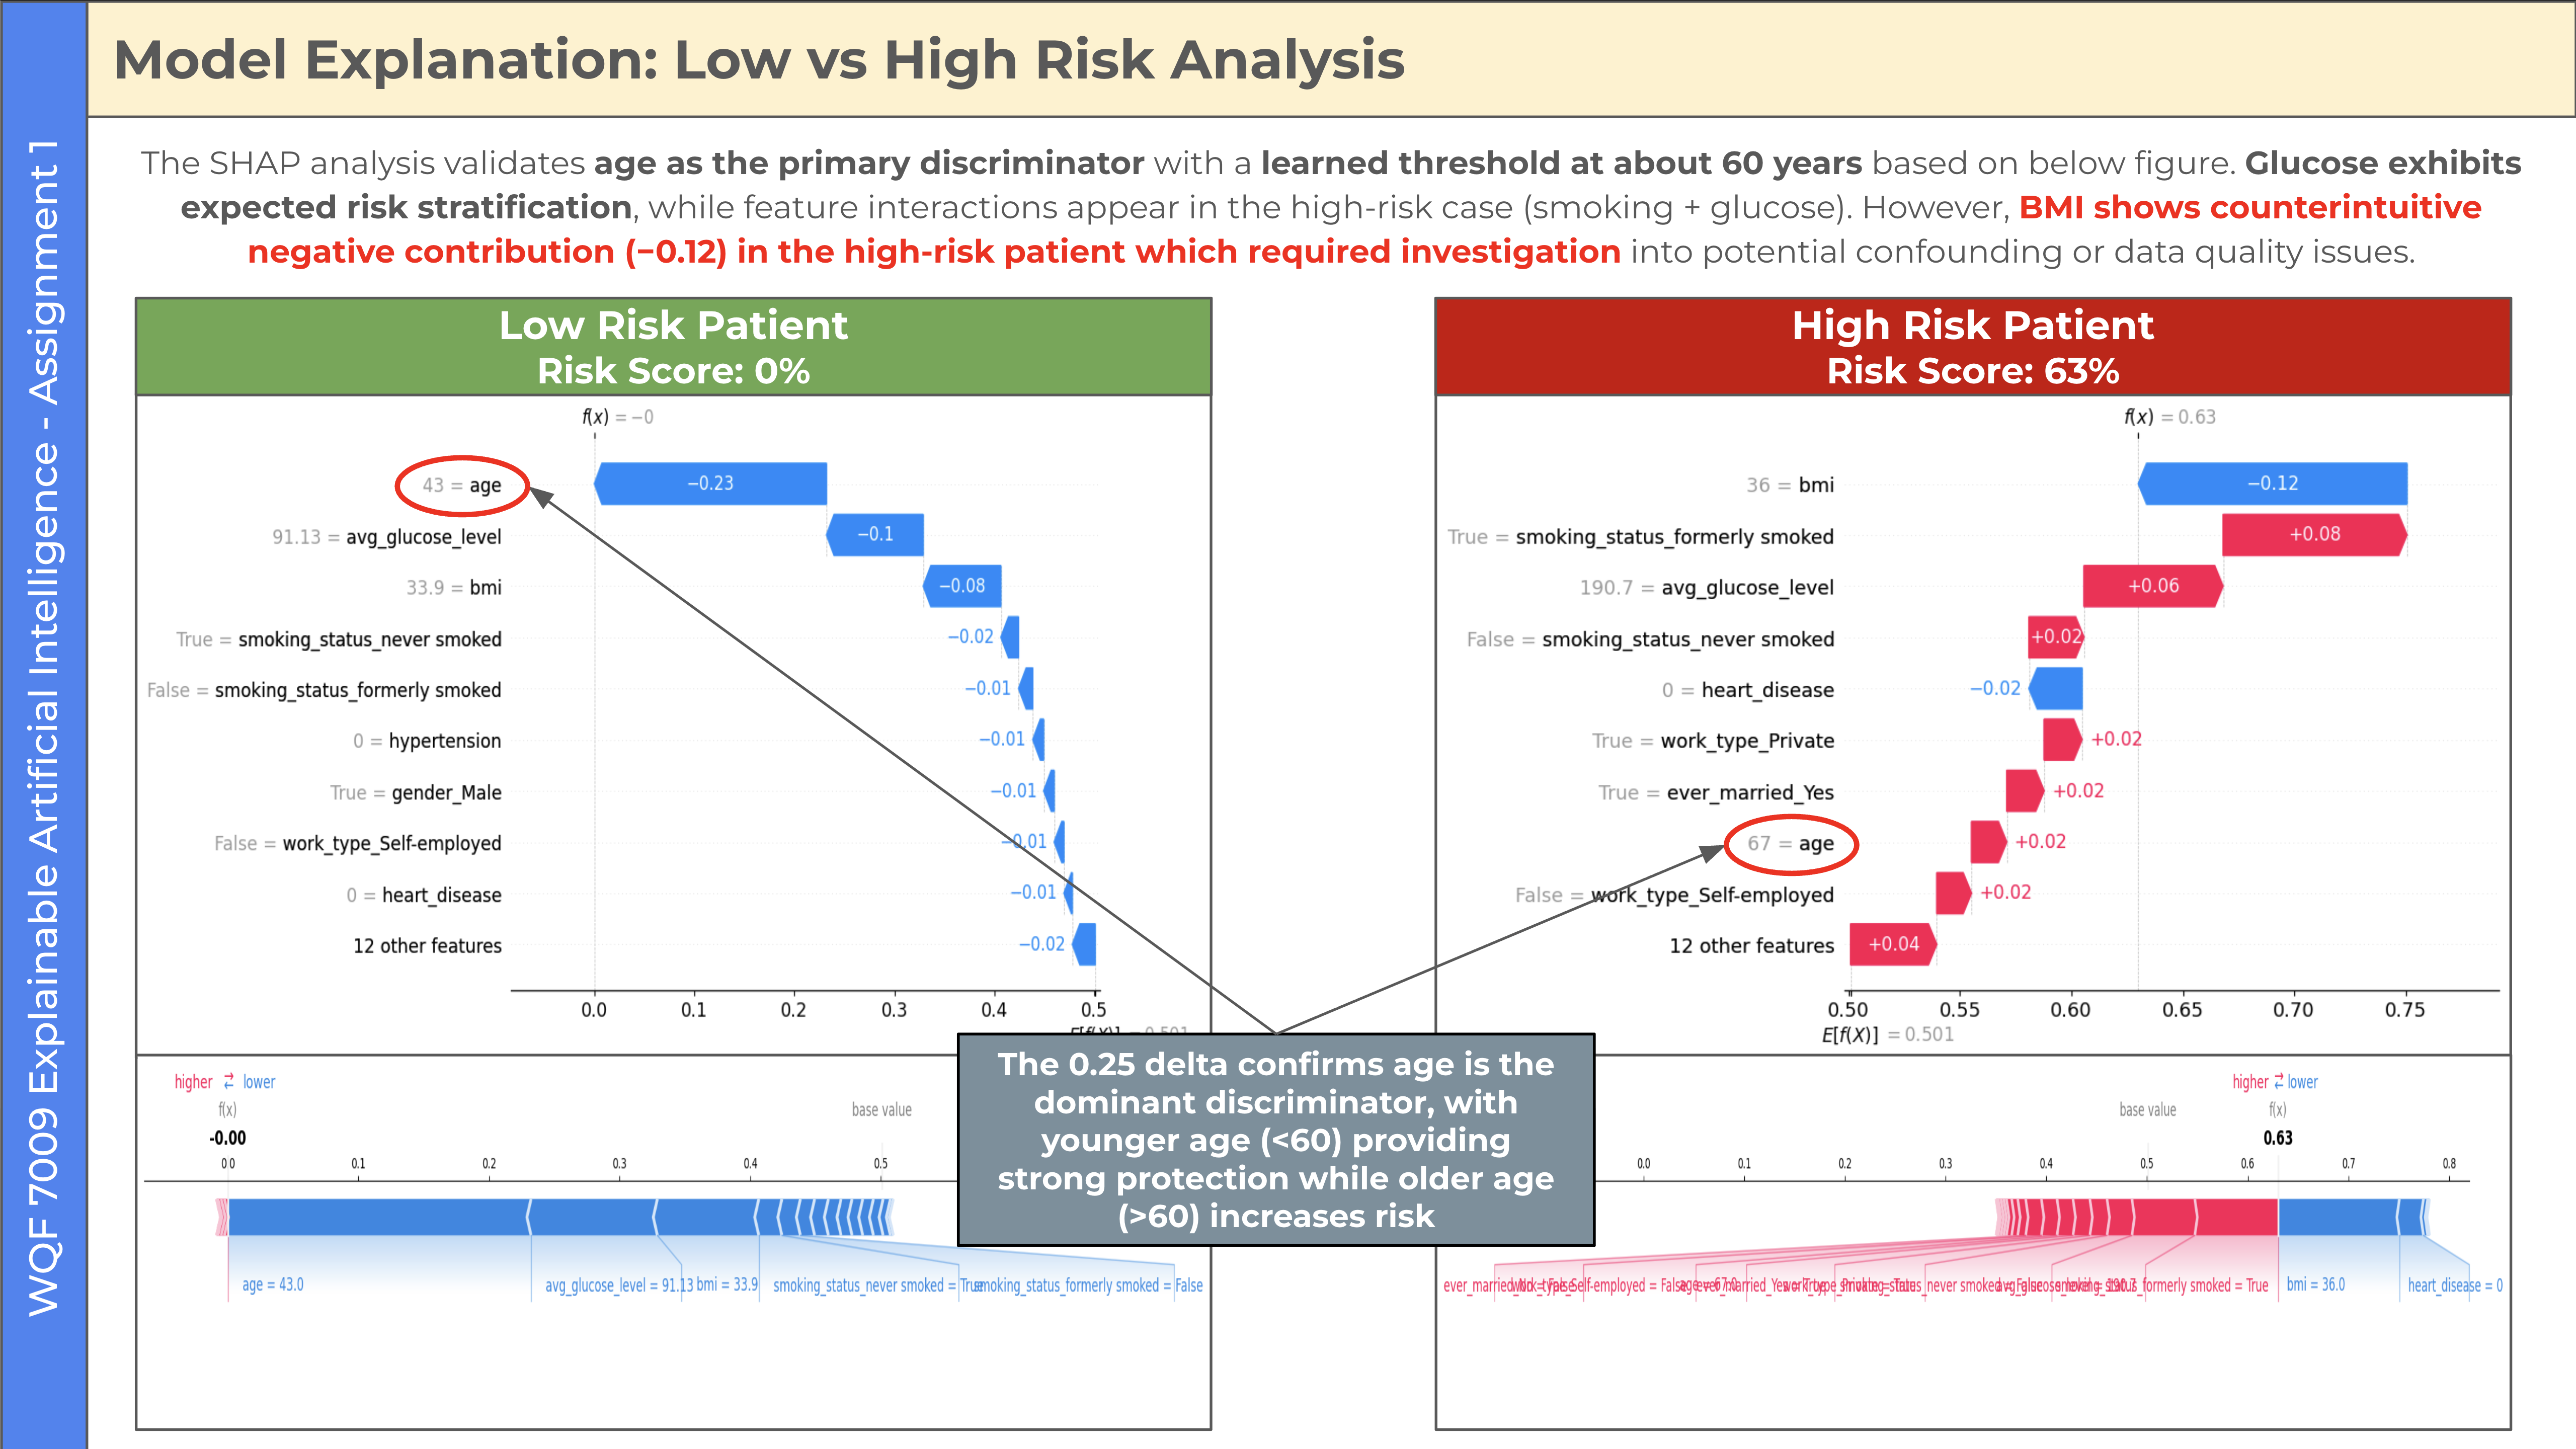

## As Doctor

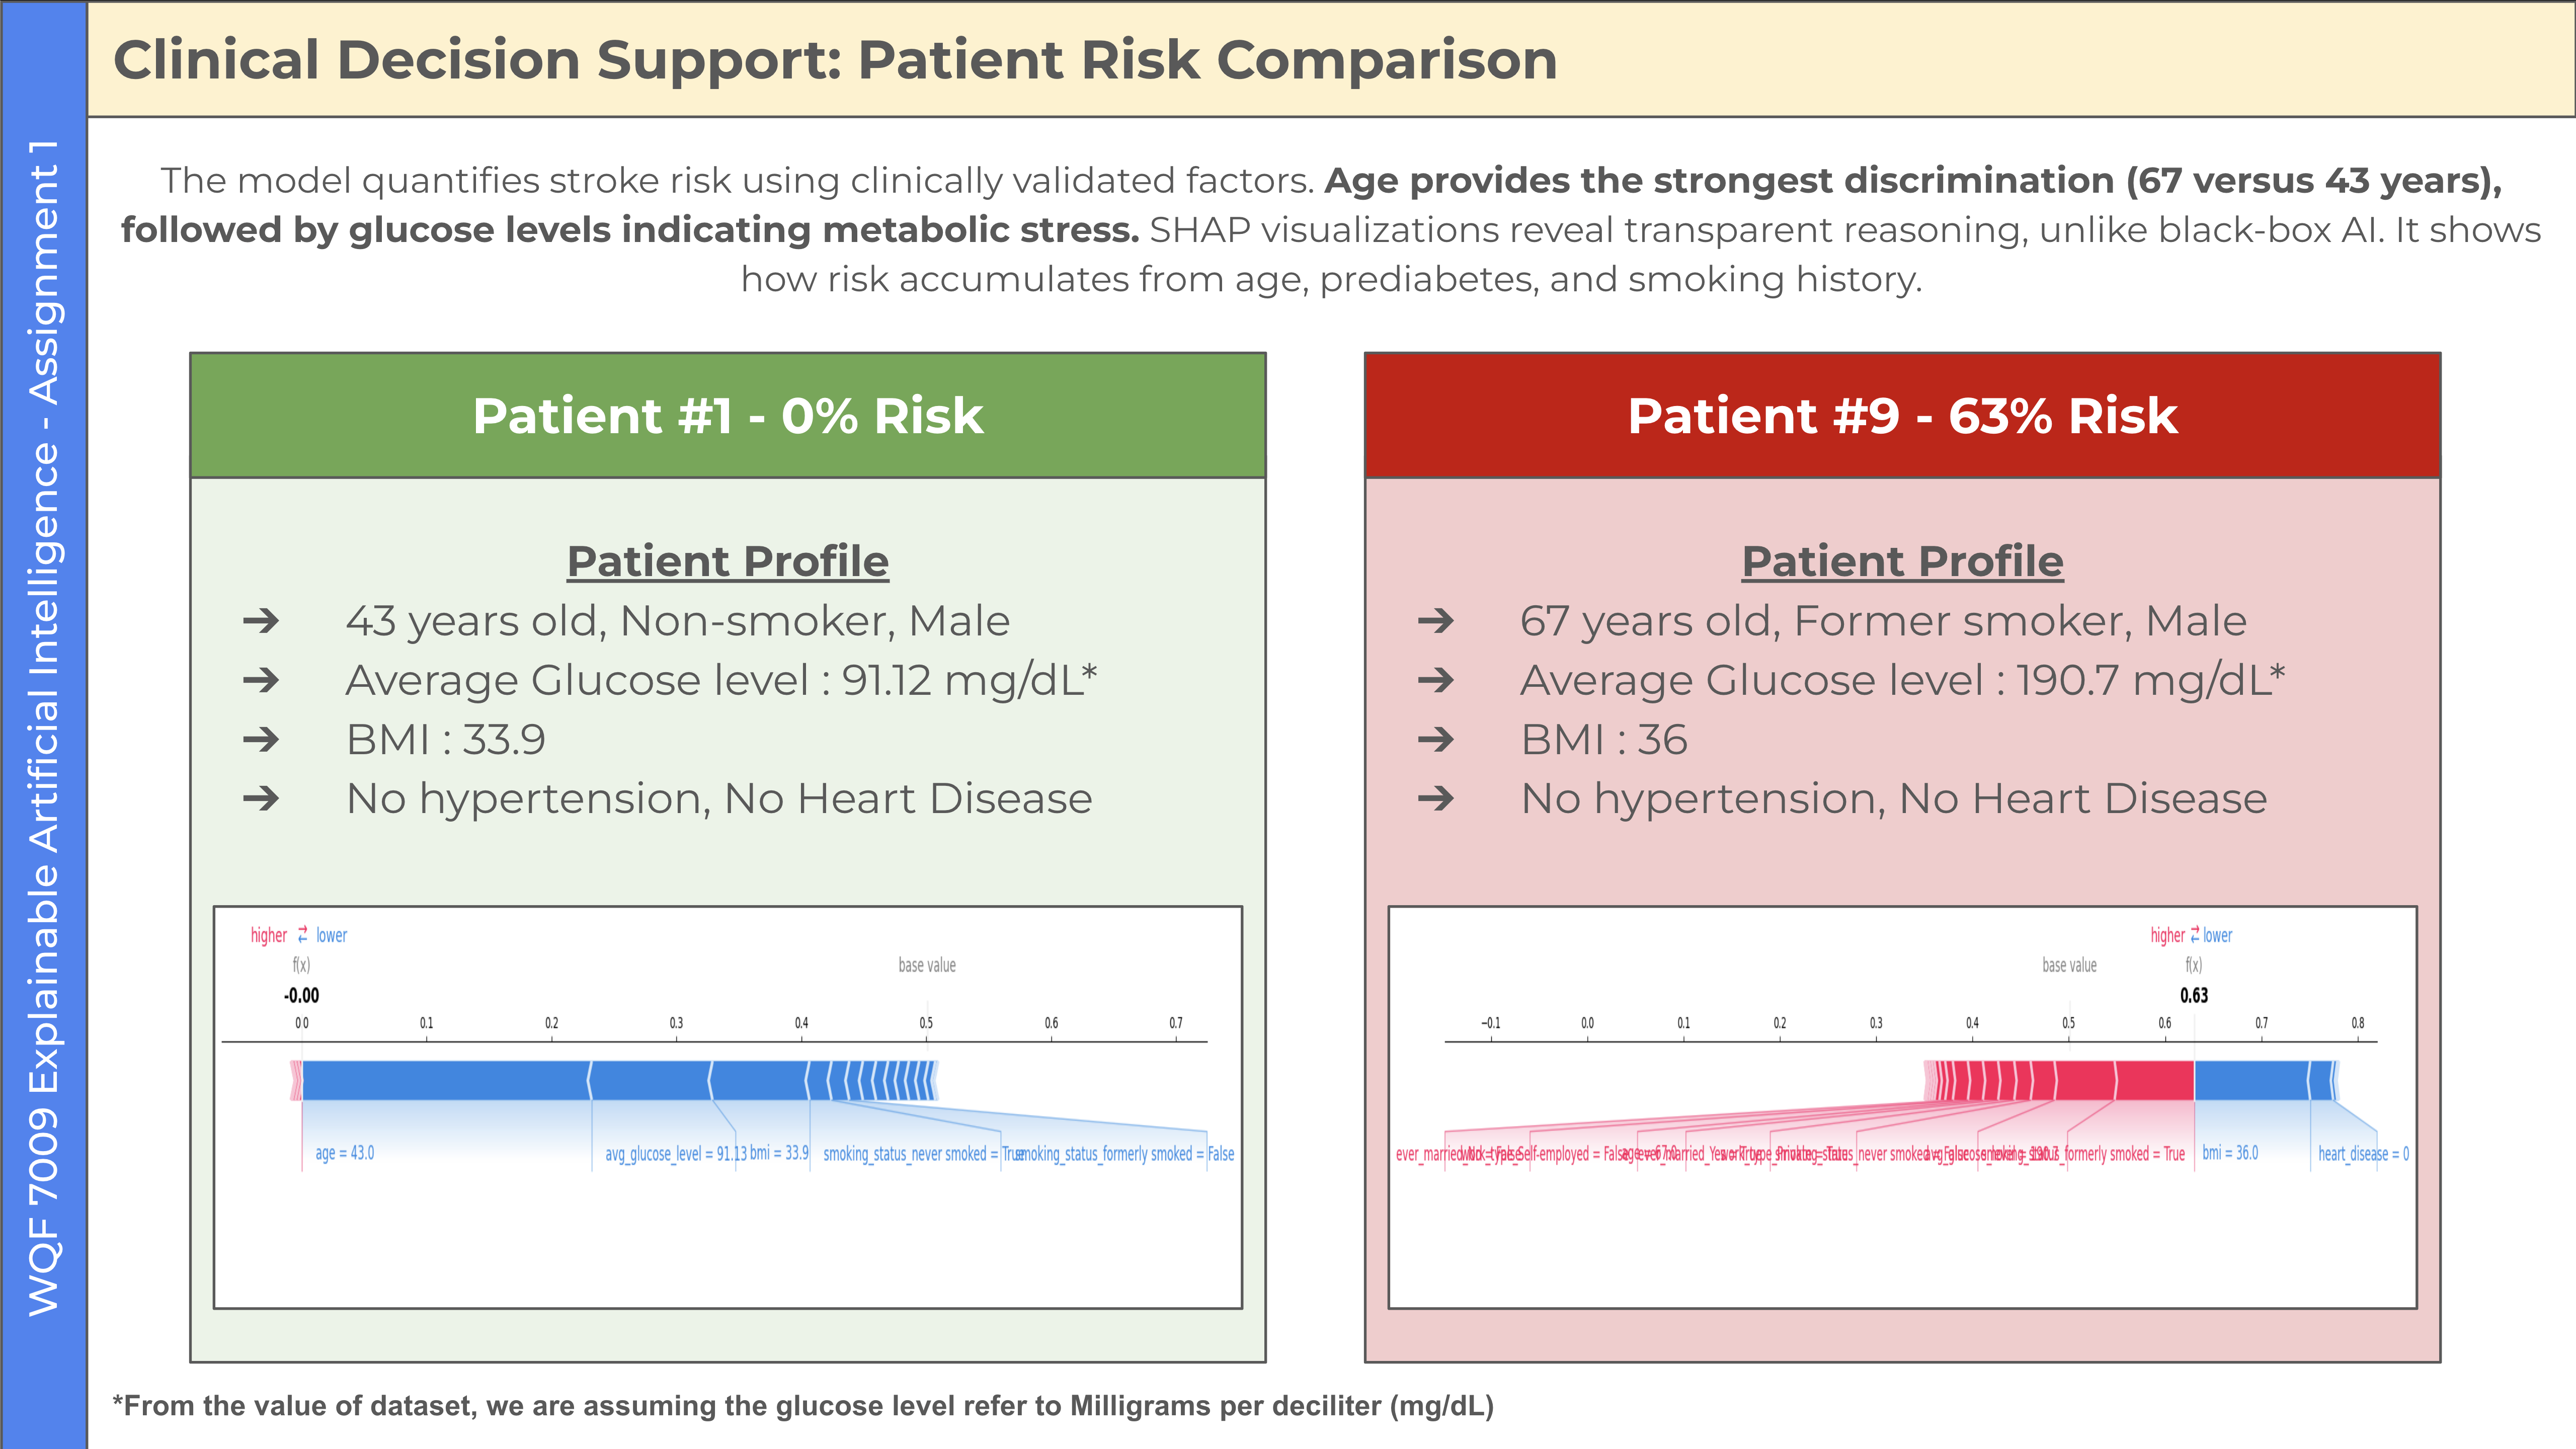

## As Patient

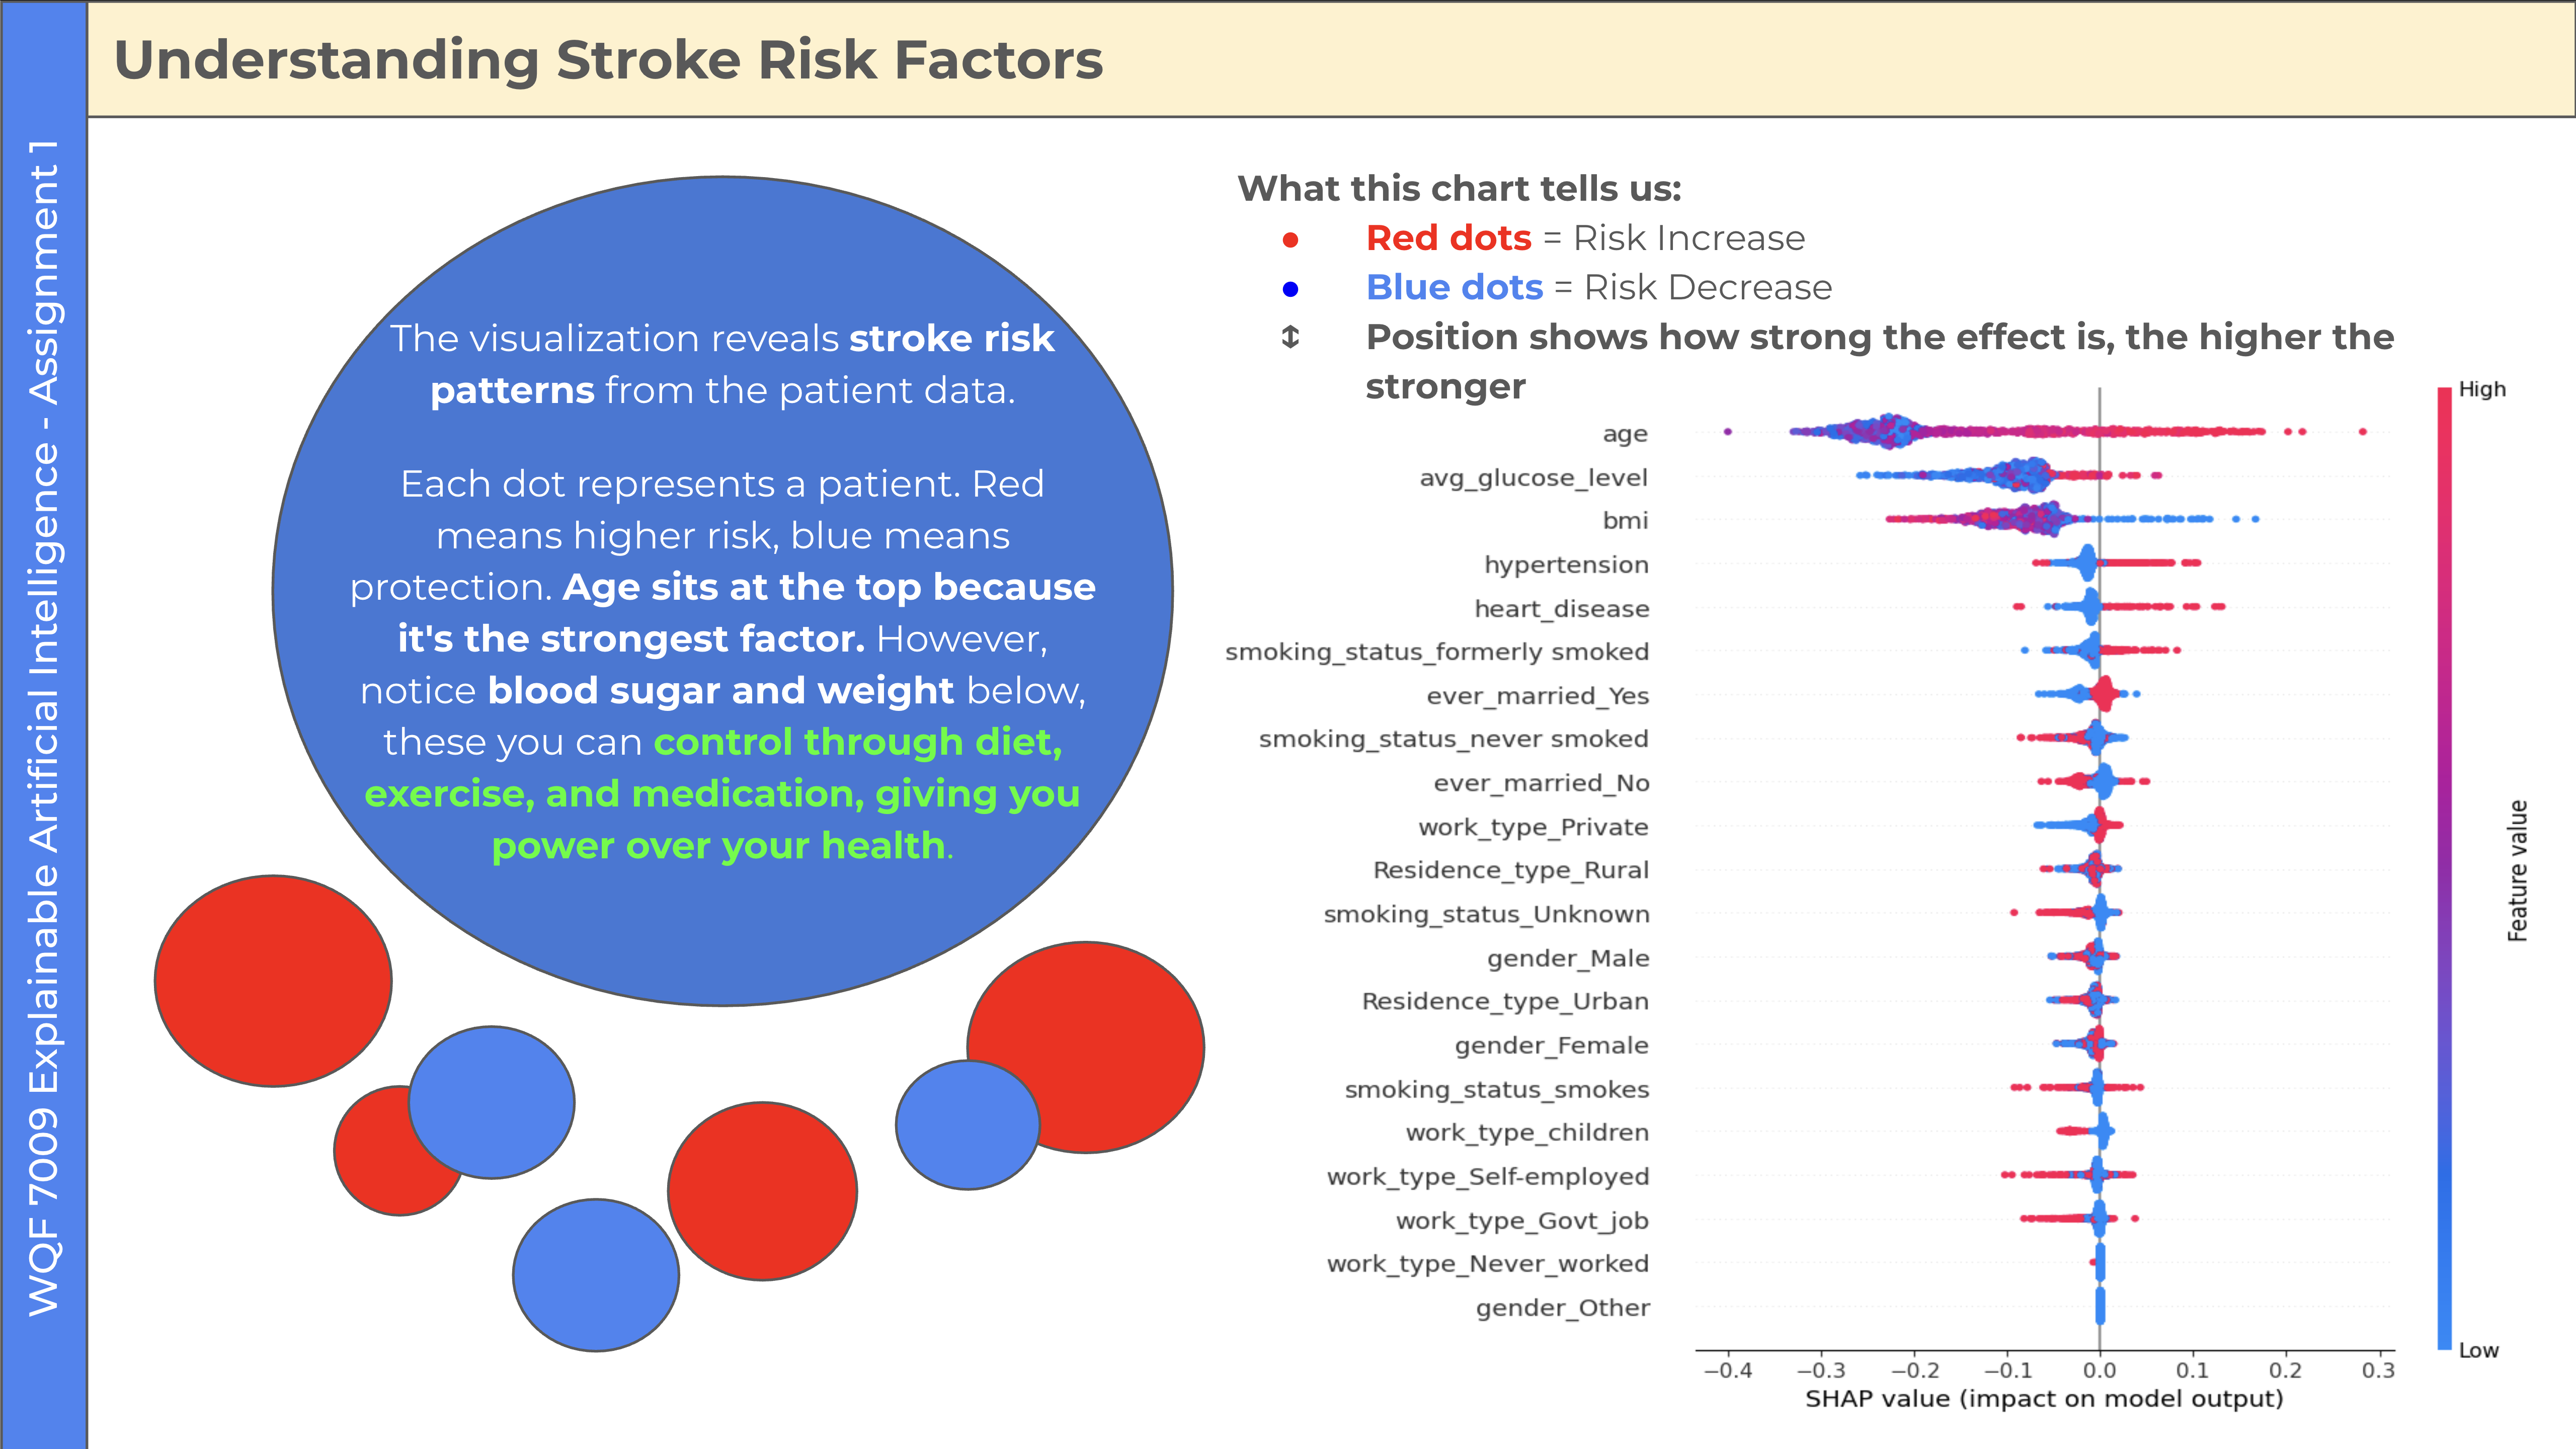

# Task 6 - Using Deep SHAP as an Explainer with MLP Model

## Setup and imports

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import shap
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.metrics import accuracy_score, classification_report
from sklearn.model_selection import train_test_split

# Import existing DataLoader
from utils import DataLoader

# Set random seeds
np.random.seed(42)
tf.random.set_seed(42)

# base URL for the raw files from github
BASE_URL = "https://raw.githubusercontent.com/ck-cap/xai-series/refs/heads/master/"

# Download the utils script
!curl -sSO {BASE_URL}utils.py

# Download the Task 1 script (EDA)
!curl -sSO {BASE_URL}00_data_exploration.py

# Download dataset and put under /data folder
!mkdir -p data
!curl -sSL -o data/stroke-prediction-dataset.zip https://www.kaggle.com/api/v1/datasets/download/fedesoriano/stroke-prediction-dataset

# Unzip the datasets then remove the zip files
!unzip -o data/stroke-prediction-dataset.zip -d data
!rm data/*.zip

# list the files to check is everything is downloaded
!ls -lR

# Initialize SHAP JavaScript visualization
shap.initjs()
print("\nDone import")

Archive:  data/stroke-prediction-dataset.zip
  inflating: data/healthcare-dataset-stroke-data.csv  
.:
total 20
-rw-r--r-- 1 root root 1365 Nov 22 10:28 00_data_exploration.py
drwxr-xr-x 2 root root 4096 Nov 22 10:29 data
drwxr-xr-x 2 root root 4096 Nov 22 10:28 __pycache__
drwxr-xr-x 1 root root 4096 Nov 20 14:30 sample_data
-rw-r--r-- 1 root root 1969 Nov 22 10:28 utils.py

./data:
total 312
-rw-r--r-- 1 root root 316971 Jan 26  2021 healthcare-dataset-stroke-data.csv

./__pycache__:
total 4
-rw-r--r-- 1 root root 2880 Nov 22 10:28 utils.cpython-312.pyc

./sample_data:
total 55504
-rwxr-xr-x 1 root root     1697 Jan  1  2000 anscombe.json
-rw-r--r-- 1 root root   301141 Nov 20 14:30 california_housing_test.csv
-rw-r--r-- 1 root root  1706430 Nov 20 14:30 california_housing_train.csv
-rw-r--r-- 1 root root 18289443 Nov 20 14:30 mnist_test.csv
-rw-r--r-- 1 root root 36523880 Nov 20 14:30 mnist_train_small.csv
-rwxr-xr-x 1 root root      962 Jan  1  2000 README.md



Done import


## Load and prepare data

In [10]:
data_loader = DataLoader()
data_loader.load_dataset()
data_loader.preprocess_data()

# Get data split
X_train, X_test, y_train, y_test = data_loader.get_data_split()

# Create validation set
X_train, X_val, y_train, y_val = train_test_split(
    X_train, y_train, test_size=0.2, random_state=42, stratify=y_train
)

# Oversample training data
X_train, y_train = data_loader.oversample(X_train, y_train)

print(f"Training set: {X_train.shape}")
print(f"Validation set: {X_val.shape}")
print(f"Test set: {X_test.shape}")

# Save feature names
feature_names = X_train.columns.tolist()

# Convert to numpy
X_train_np = X_train.values.astype(np.float32)
X_val_np = X_val.values.astype(np.float32)
X_test_np = X_test.values.astype(np.float32)
y_train_np = y_train.values.astype(np.float32).reshape(-1, 1)
y_val_np = y_val.values.astype(np.float32).reshape(-1, 1)
y_test_np = y_test.values.astype(np.float32).reshape(-1, 1)


Training set: (6222, 21)
Validation set: (818, 21)
Test set: (1022, 21)


## Build MLP Model as the Black Boc Model

In [11]:
model = keras.Sequential([
    layers.Input(shape=(X_train_np.shape[1],)),
    layers.Dense(128, activation='relu', name='hidden_1'),
    layers.Dropout(0.3, name='dropout_1'),
    layers.Dense(64, activation='relu', name='hidden_2'),
    layers.Dropout(0.3, name='dropout_2'),
    layers.Dense(32, activation='relu', name='hidden_3'),
    layers.Dropout(0.3, name='dropout_3'),
    layers.Dense(1, activation='sigmoid', name='output')
])

model.compile(
    optimizer=keras.optimizers.Adam(learning_rate=0.001),
    loss='binary_crossentropy',
    metrics=['accuracy', keras.metrics.AUC(name='auc')]
)

model.summary()
print("\Done build MLP model...")

<>:19: SyntaxWarning: invalid escape sequence '\D'
<>:19: SyntaxWarning: invalid escape sequence '\D'
/tmp/ipython-input-335881223.py:19: SyntaxWarning: invalid escape sequence '\D'
  print("\Done build MLP model...")


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ hidden_1 (Dense)                │ (None, 128)            │         2,816 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ hidden_2 (Dense)                │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ hidden_3 (Dense)                │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ output (Dense)                  │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 13,185 (51.50 KB)

 Trainable params: 13,185 (51.50 KB)

 Non-trainable params: 0 (0.00 B)

\Done build MLP model...


## Train Model


Training model...
Epoch 1/100
195/195 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.5193 - auc: 0.5320 - loss: 2.9215 - val_accuracy: 0.8484 - val_auc: 0.8288 - val_loss: 0.5790
Epoch 2/100
195/195 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.6094 - auc: 0.6545 - loss: 0.7244 - val_accuracy: 0.7372 - val_auc: 0.8623 - val_loss: 0.5426
Epoch 3/100
195/195 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.6634 - auc: 0.7233 - loss: 0.6242 - val_accuracy: 0.7763 - val_auc: 0.8664 - val_loss: 0.4662
Epoch 4/100
195/195 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.6997 - auc: 0.7798 - loss: 0.5708 - val_accuracy: 0.7567 - val_auc: 0.8683 - val_loss: 0.4571
Epoch 5/100
195/195 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7159 - auc: 0.7930 - loss: 0.5492 - val_accuracy: 0.7482 - val_auc: 0.8695 - val_loss: 0.4609
Epoch 6/100
195/195 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7342 - auc: 0.8113 - loss: 0.5267 - val_accuracy: 0.7457 - val_auc: 0.8764 - val_loss: 0.4604
Epoch 7/100
195

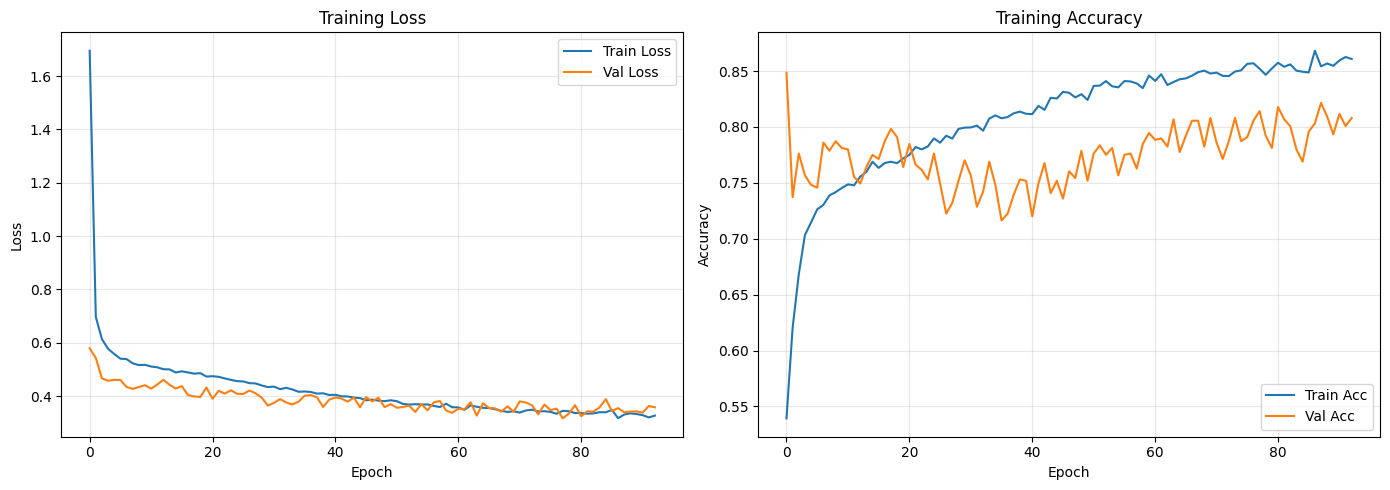

In [12]:
print("\nTraining model...")

early_stop = EarlyStopping(
    monitor='val_loss',
    patience=15,
    restore_best_weights=True,
    verbose=1
)

history = model.fit(
    X_train_np, y_train,
    validation_data=(X_val_np, y_val),
    epochs=100,
    batch_size=32,
    callbacks=[early_stop],
    verbose=1
)

# Plot training history
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

axes[0].plot(history.history['loss'], label='Train Loss')
axes[0].plot(history.history['val_loss'], label='Val Loss')
axes[0].set_xlabel('Epoch')
axes[0].set_ylabel('Loss')
axes[0].set_title('Training Loss')
axes[0].legend()
axes[0].grid(True, alpha=0.3)

axes[1].plot(history.history['accuracy'], label='Train Acc')
axes[1].plot(history.history['val_accuracy'], label='Val Acc')
axes[1].set_xlabel('Epoch')
axes[1].set_ylabel('Accuracy')
axes[1].set_title('Training Accuracy')
axes[1].legend()
axes[1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

## Evaluate Model

In [13]:
print("\nEvaluating model...")

y_pred_proba = model.predict(X_test_np)
y_pred = (y_pred_proba > 0.5).astype(int)

test_loss, test_acc, test_auc = model.evaluate(X_test_np, y_test, verbose=0)

print(f"\nTest Accuracy: {test_acc:.4f}")
print(f"Test AUC: {test_auc:.4f}")
print("\nClassification Report:")
print(classification_report(y_test, y_pred, target_names=['No Stroke', 'Stroke']))



Evaluating model...
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step

Test Accuracy: 0.7789
Test AUC: 0.7522

Classification Report:
              precision    recall  f1-score   support

   No Stroke       0.97      0.79      0.87       972
      Stroke       0.12      0.56      0.20        50

    accuracy                           0.78      1022
   macro avg       0.55      0.68      0.54      1022
weighted avg       0.93      0.78      0.84      1022



## Create Deep SHAP Explainer

In [54]:
print("\nCreating Deep SHAP explainer...")

# Select background data (100 samples)
background_size = 100
background_indices = np.random.choice(X_train_np.shape[0], background_size, replace=False)
background_data = X_train_np[background_indices]

# Create explainer
explainer = shap.DeepExplainer(model, background_data)
print("Deep SHAP explainer created!")

# Calculate SHAP values for test samples
test_sample_size = 200
X_test_sample = X_test_np[:test_sample_size]

print(f"Calculating SHAP values for {test_sample_size} samples...")
shap_values = explainer(X_test_sample) 
expected_value = float(np.array(explainer.expected_value).flatten()[0]) 
print("SHAP values calculated!")
print(f"SHAP values shape: {shap_values.shape}")
print(f"Expected value: {expected_value}")

# Extract feature names from original DataFrame
feature_names = X_train.columns.tolist()
print("Feature names:", feature_names)
print(f"Number of features: {len(feature_names)}")
shap_values.feature_names = feature_names

if shap_values.base_values is None:
    # Create base_values array with the expected value for all samples
    shap_values.base_values = np.full(test_sample_size, expected_value)
    print(f"Base values set manually: {shap_values.base_values.shape}")
else:
    print(f"Base values: {shap_values.base_values.shape}")



Creating Deep SHAP explainer...
Deep SHAP explainer created!
Calculating SHAP values for 200 samples...
SHAP values calculated!
SHAP values shape: (200, 21, 1)
Expected value: 0.4469389319419861
Feature names: ['gender_Female', 'gender_Male', 'gender_Other', 'ever_married_No', 'ever_married_Yes', 'work_type_Govt_job', 'work_type_Never_worked', 'work_type_Private', 'work_type_Self-employed', 'work_type_children', 'Residence_type_Rural', 'Residence_type_Urban', 'smoking_status_Unknown', 'smoking_status_formerly smoked', 'smoking_status_never smoked', 'smoking_status_smokes', 'age', 'hypertension', 'heart_disease', 'avg_glucose_level', 'bmi']
Number of features: 21
Base values set manually: (200,)


## Local Explaination


=== LOCAL EXPLANATIONS ===
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 

High-risk patient (index 39):
Predicted probability: 0.9110

Low-risk patient (index 142):
Predicted probability: 0.0000

--- Waterfall Plot: High-Risk Patient ---


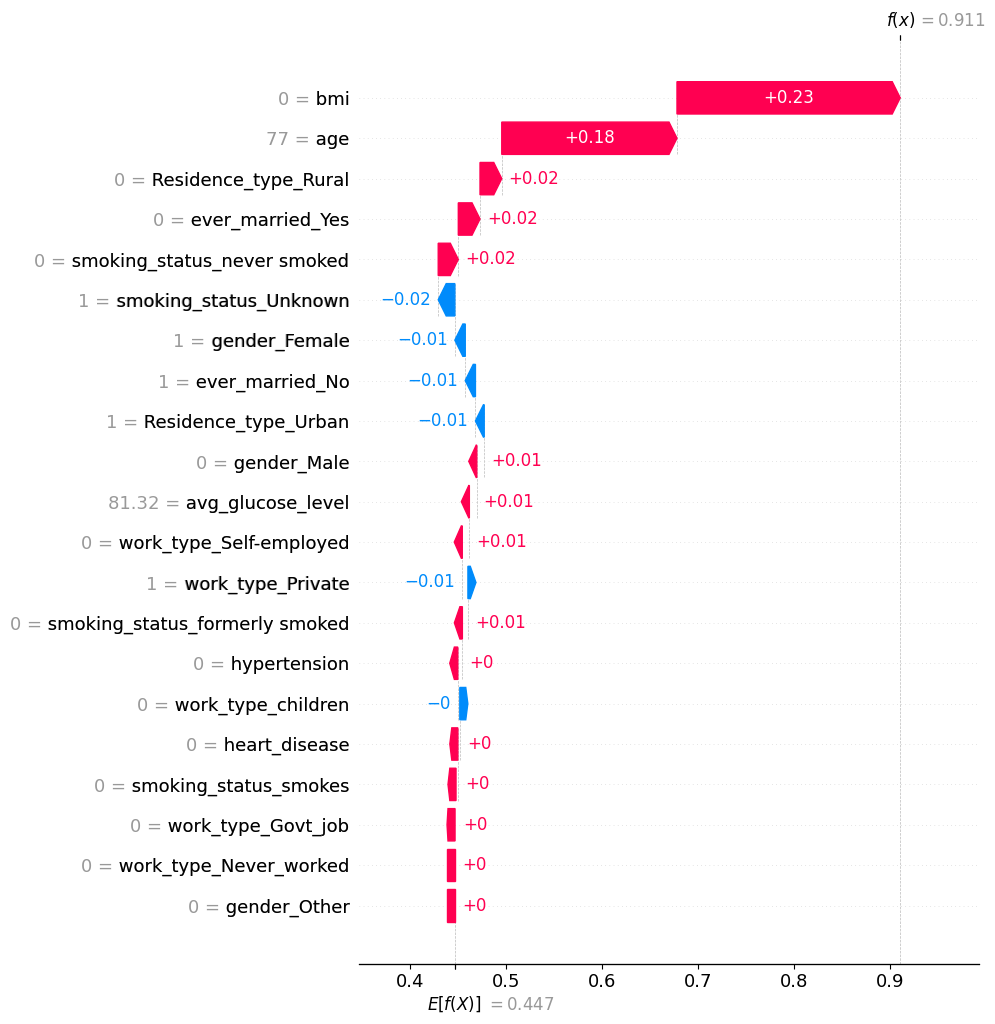


--- Waterfall Plot: Low-Risk Patient ---


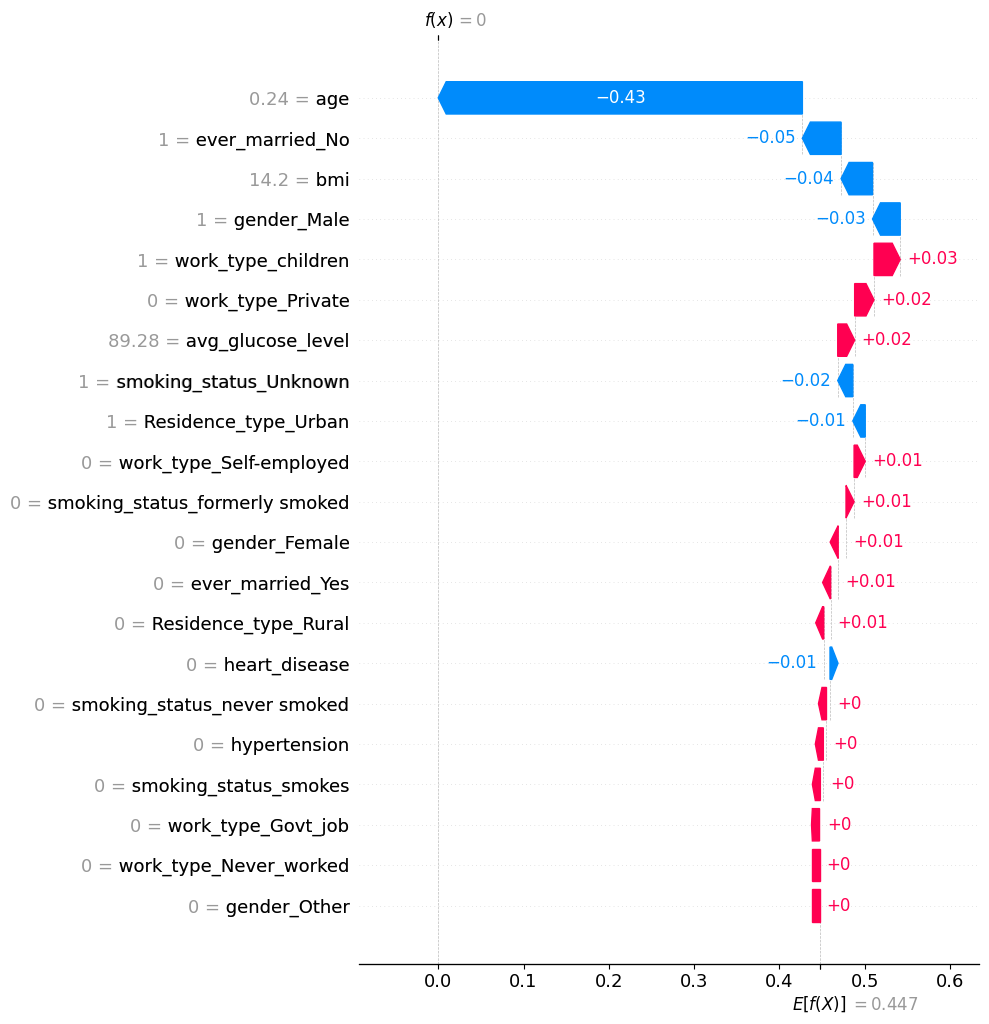


--- Force Plot: High-Risk Patient (Modern API) ---


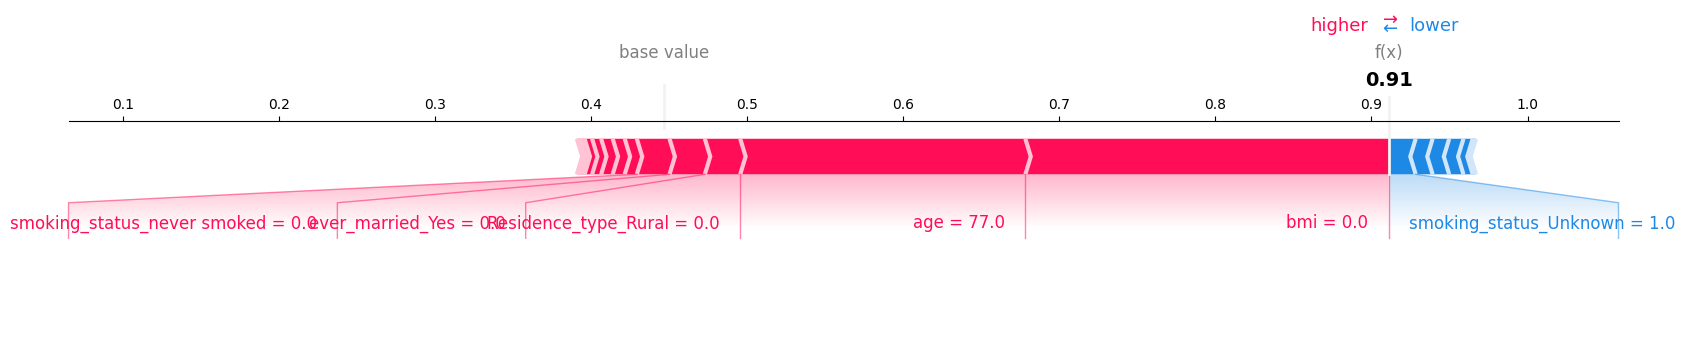

<Figure size 640x480 with 0 Axes>


--- Force Plot: Low-Risk Patient (Modern API) ---


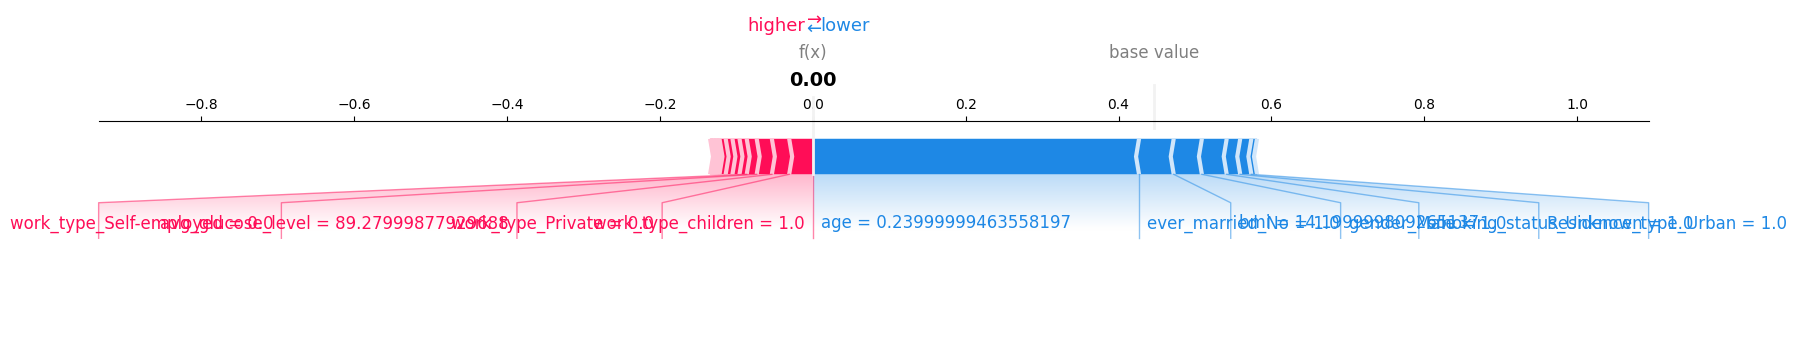

<Figure size 640x480 with 0 Axes>

In [60]:
print("\n=== LOCAL EXPLANATIONS ===")

# Find high-risk and low-risk patients
predictions_sample = model.predict(X_test_sample).flatten()
high_risk_idx = np.argmax(predictions_sample)
low_risk_idx = np.argmin(predictions_sample)

print(f"\nHigh-risk patient (index {high_risk_idx}):")
print(f"Predicted probability: {predictions_sample[high_risk_idx]:.4f}")

print(f"\nLow-risk patient (index {low_risk_idx}):")
print(f"Predicted probability: {predictions_sample[low_risk_idx]:.4f}")

# WATERFALL PLOTS 
print("\n--- Waterfall Plot: High-Risk Patient ---")
explanation_hr = shap_values[high_risk_idx, :, 0]
shap.plots.waterfall(explanation_hr, max_display=23)

print("\n--- Waterfall Plot: Low-Risk Patient ---")
explanation_lr = shap_values[low_risk_idx, :, 0]
shap.plots.waterfall(explanation_lr, max_display=23)

# FORCE PLOTS 
print("\n--- Force Plot: High-Risk Patient (Modern API) ---")
shap.plots.force(explanation_hr,matplotlib=True)
plt.tight_layout()
plt.show()

print("\n--- Force Plot: Low-Risk Patient (Modern API) ---")
shap.plots.force(explanation_lr,matplotlib=True)

plt.tight_layout()
plt.show()


## Global Explaination


--- Bar Plot: Feature Importance ---


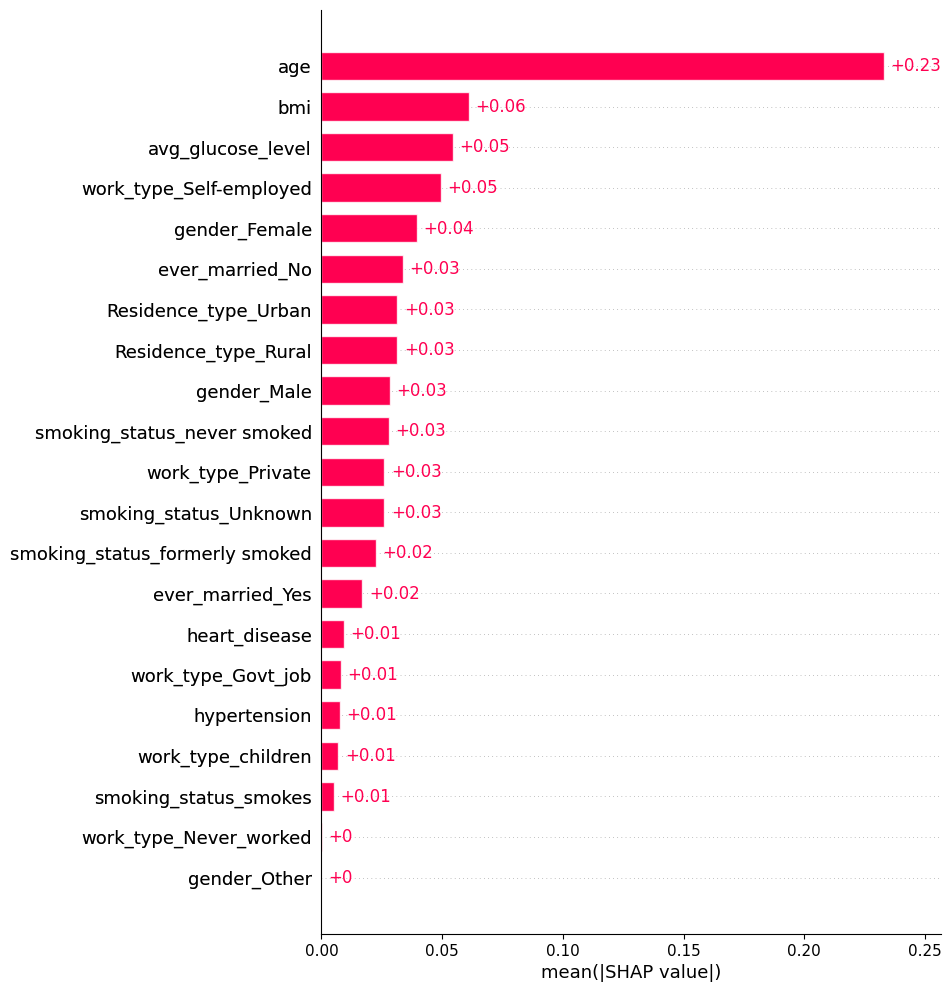


--- Beeswarm Plot: Feature Impact Distribution ---


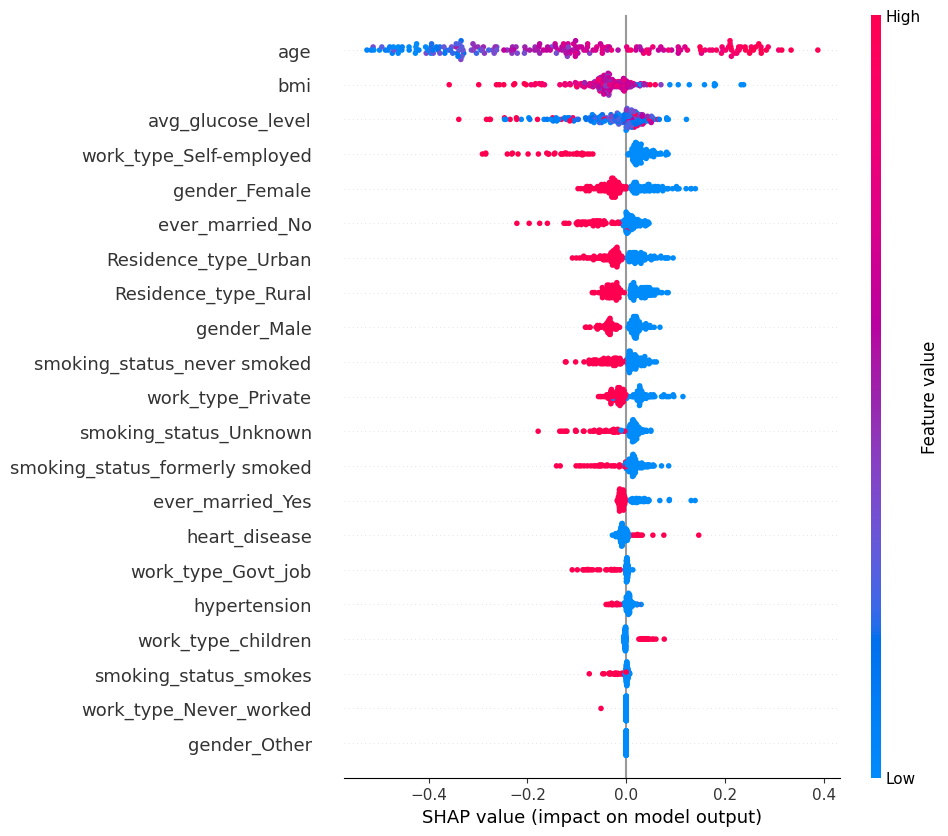


--- Dependence Plot: Age ---


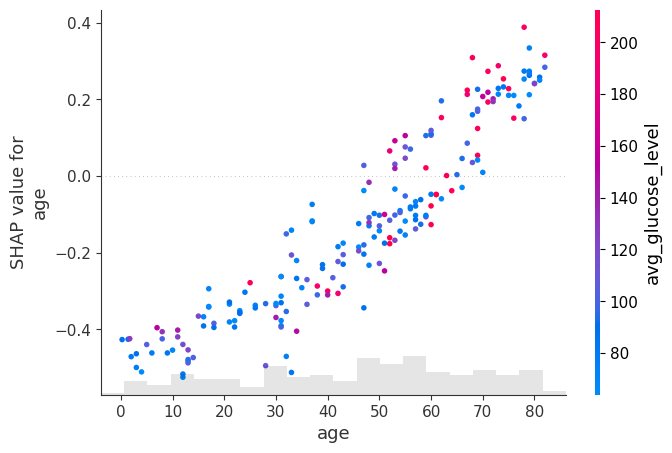

<Figure size 640x480 with 0 Axes>


--- Heatmap: SHAP Values ---


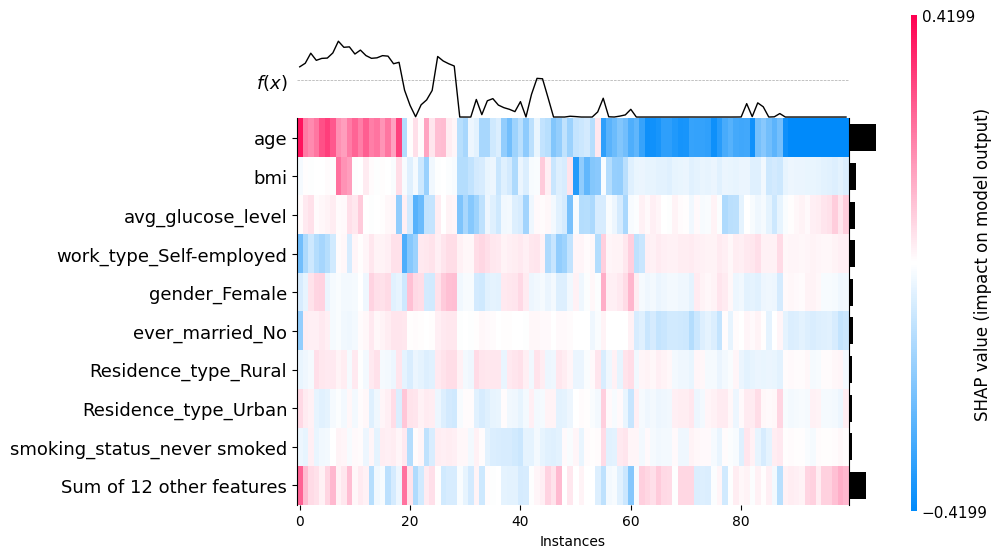

<Axes: xlabel='Instances'>

In [63]:

# Bar Plot - Feature Importance
print("\n--- Bar Plot: Feature Importance ---")
shap.plots.bar(shap_values[:, :, 0], max_display=23)

# Beeswarm Plot - Feature Impact Distribution
print("\n--- Beeswarm Plot: Feature Impact Distribution ---")
shap.plots.beeswarm(shap_values[:, :, 0], max_display=23)

# Dependence Plot - Age feature
print("\n--- Dependence Plot: Age ---")
shap.plots.scatter(shap_values[:, :, 0][:, "age"], color=shap_values[:, :, 0])

plt.tight_layout()
plt.show()

# Heatmap
print("\n--- Heatmap: SHAP Values ---")
shap.plots.heatmap(shap_values[:100, :, 0])